<a href="https://colab.research.google.com/github/nilamaula26/Praktikum-Kuliah/blob/main/Linear_Regression_Stress_Level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
dataset= pd.read_csv("/content/Sleep_health_and_lifestyle_dataset_1_ (1).csv")
dataset.head(6)

,Person ID,Gender,Age,Occupation,BMI Category,Sleep Duration,Quality of Sleep,Physical Activity Level,Blood Pressure,Heart Rate,Daily Steps,Stress Level
0,1,1,27,Software Engineer,1,6.01,6,42,126/83,77,4200,6
1,2,1,28,Doctor,0,6.02,6,60,125/80,75,10000,8
2,3,1,28,Doctor,0,6.02,6,60,125/80,75,10000,8
3,4,1,28,Sales Representative,2,5.09,4,30,140/90,85,3000,8
4,5,1,28,Sales Representative,2,5.09,4,30,140/90,85,3000,8
5,6,1,28,Software Engineer,2,5.09,4,30,140/90,85,3000,8


In [2]:
print("Jumlah dataset saya: "+str(len(dataset.index)))

Jumlah dataset saya: 374


In [3]:
# Splitting the blood pressure values into systolic and diastolic values
dataset[['Systolic_BP', 'Diastolic_BP']] = dataset['Blood Pressure'].str.split('/', expand=True)

# Converting the systolic and diastolic values to numeric data type
dataset['Systolic_BP'] = dataset['Systolic_BP'].astype(int)
dataset['Diastolic_BP'] = dataset['Diastolic_BP'].astype(int)

# Print the updated dataset with readable blood pressure values
print(dataset)


     Person ID  Gender  Age            Occupation  BMI Category  \
0            1       1   27     Software Engineer             1   
1            2       1   28                Doctor             0   
2            3       1   28                Doctor             0   
3            4       1   28  Sales Representative             2   
4            5       1   28  Sales Representative             2   
..         ...     ...  ...                   ...           ...   
369        370       0   59                 Nurse             1   
370        371       0   59                 Nurse             1   
371        372       0   59                 Nurse             1   
372        373       0   59                 Nurse             1   
373        374       0   59                 Nurse             1   

     Sleep Duration  Quality of Sleep  Physical Activity Level Blood Pressure  \
0              6.01                 6                       42         126/83   
1              6.02              

In [4]:
# Drop the "Blood Pressure" column from the dataset
dataset = dataset.drop("Blood Pressure", axis=1)

# Print the updated dataset without the "Blood Pressure" column
print(dataset)


     Person ID  Gender  Age            Occupation  BMI Category  \
0            1       1   27     Software Engineer             1   
1            2       1   28                Doctor             0   
2            3       1   28                Doctor             0   
3            4       1   28  Sales Representative             2   
4            5       1   28  Sales Representative             2   
..         ...     ...  ...                   ...           ...   
369        370       0   59                 Nurse             1   
370        371       0   59                 Nurse             1   
371        372       0   59                 Nurse             1   
372        373       0   59                 Nurse             1   
373        374       0   59                 Nurse             1   

     Sleep Duration  Quality of Sleep  Physical Activity Level  Heart Rate  \
0              6.01                 6                       42          77   
1              6.02                 6  

In [5]:
from sklearn.preprocessing import OrdinalEncoder

# Create an instance of OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Reshape the "Occupation" data to match the expected input shape of OrdinalEncoder
encoded_occupation = ordinal_encoder.fit_transform(dataset['Occupation'].values.reshape(-1, 1))

# Convert the encoded occupation array to integers
encoded_occupation = encoded_occupation.astype(int)

# Create a dictionary mapping encoded values to category labels
category_dict = {encoded_value: category_label for encoded_value, category_label in zip(encoded_occupation.flatten(), dataset['Occupation'])}
dataset['Occupation'] = encoded_occupation

# Print the encoded occupation values and the corresponding dictionary
print(encoded_occupation)
print(category_dict)


[[ 9]
 [ 1]
 [ 1]
 [ 6]
 [ 6]
 [ 9]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 5]
 [ 1]
 [ 5]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 5]
 [ 5]
 [ 5]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 0]
 [ 1]
 [ 8]
 [ 8]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 8]
 [ 8]
 [10]
 [10]
 [ 9]
 [ 0]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 9]
 [ 3]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [ 5]
 [ 2]
 [ 2]
 [ 3]
 [ 0]
 [ 3]
 [ 0]
 [ 3]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 5]
 [ 3]
 [ 0]
 [ 3]
 [ 3]
 [ 0]
 [ 3]
 [ 3]
 [ 0]
 [ 3]
 [ 3]
 [ 0]
 [ 3]
 [ 0]
 [ 3]
 [ 0]
 [ 3]
 [ 0]
 [ 0]
 [ 3]
 [ 3]
 [ 3]
 [ 2]
 [ 3]
 [ 0]
 [ 0]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 0]
 [ 0]
 [ 3]
 [ 3]
 [ 3]
 [ 2

In [6]:
print(dataset)

     Person ID  Gender  Age  Occupation  BMI Category  Sleep Duration  \
0            1       1   27           9             1            6.01   
1            2       1   28           1             0            6.02   
2            3       1   28           1             0            6.02   
3            4       1   28           6             2            5.09   
4            5       1   28           6             2            5.09   
..         ...     ...  ...         ...           ...             ...   
369        370       0   59           5             1            8.01   
370        371       0   59           5             1            8.00   
371        372       0   59           5             1            8.01   
372        373       0   59           5             1            8.01   
373        374       0   59           5             1            8.01   

     Quality of Sleep  Physical Activity Level  Heart Rate  Daily Steps  \
0                   6                       42  

In [7]:
dataset.describe()

,Person ID,Gender,Age,Occupation,BMI Category,Sleep Duration,Quality of Sleep,Physical Activity Level,Heart Rate,Daily Steps,Stress Level,Systolic_BP,Diastolic_BP
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,0.505348,42.184492,3.772727,0.449198,6.796631,7.312834,59.171123,70.165775,6816.844920,5.385027,128.553476,84.649733
std,108.108742,0.500641,8.673133,3.056081,0.549274,0.770071,1.196956,20.830804,4.135676,1617.915679,1.774526,7.748118,6.161611
min,1.000000,0.000000,27.000000,0.000000,0.000000,5.080000,4.000000,30.000000,65.000000,3000.000000,3.000000,115.000000,75.000000
25%,94.250000,0.000000,35.250000,1.000000,0.000000,6.040000,6.000000,45.000000,68.000000,5600.000000,4.000000,125.000000,80.000000
50%,187.500000,1.000000,43.000000,3.000000,0.000000,7.020000,7.000000,60.000000,70.000000,7000.000000,5.000000,130.000000,85.000000
75%,280.750000,1.000000,50.000000,5.000000,1.000000,7.080000,8.000000,75.000000,72.000000,8000.000000,7.000000,135.000000,90.000000
max,374.000000,1.000000,59.000000,10.000000,2.000000,8.050000,9.000000,90.000000,86.000000,10000.000000,8.000000,142.000000,95.000000


In [25]:
# Drop the "Person ID" column from the dataset
dataset = dataset.drop("Person ID", axis=1)

# Print the updated dataset without the "Blood Pressure" column
print(dataset)


     Gender  Age  Occupation  BMI Category  Sleep Duration  Quality of Sleep  \
0         1   27           9             1            6.01                 6   
1         1   28           1             0            6.02                 6   
2         1   28           1             0            6.02                 6   
3         1   28           6             2            5.09                 4   
4         1   28           6             2            5.09                 4   
..      ...  ...         ...           ...             ...               ...   
369       0   59           5             1            8.01                 9   
370       0   59           5             1            8.00                 9   
371       0   59           5             1            8.01                 9   
372       0   59           5             1            8.01                 9   
373       0   59           5             1            8.01                 9   

     Physical Activity Level  Heart Rat

Penentuan variabel dan pembagian data

In [26]:
x = dataset.drop(columns=['Stress Level'])
y = dataset['Stress Level']

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [30]:
regressor.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = regressor.predict(x_test)

In [32]:
print(regressor.intercept_)

8.02264066658208


In [33]:
print(regressor.coef_)

[ 0.76678786  2.50179801 -0.97379151 -1.74279369 -1.58261508 -5.51845884
 -0.59286503  2.17682871  1.4553585  -1.2176344   1.35310915]


In [34]:
dataframe = pd.DataFrame({'Data Sebenarnya': y_test, 'Data Prediksi': y_pred})
dataframe

,Data Sebenarnya,Data Prediksi
122,4,4.202100
295,8,7.889643
311,7,6.473698
210,5,5.335457
204,4,4.183301
...,...,...
334,3,3.146147
302,6,6.197505
324,3,3.073295
17,8,7.821414


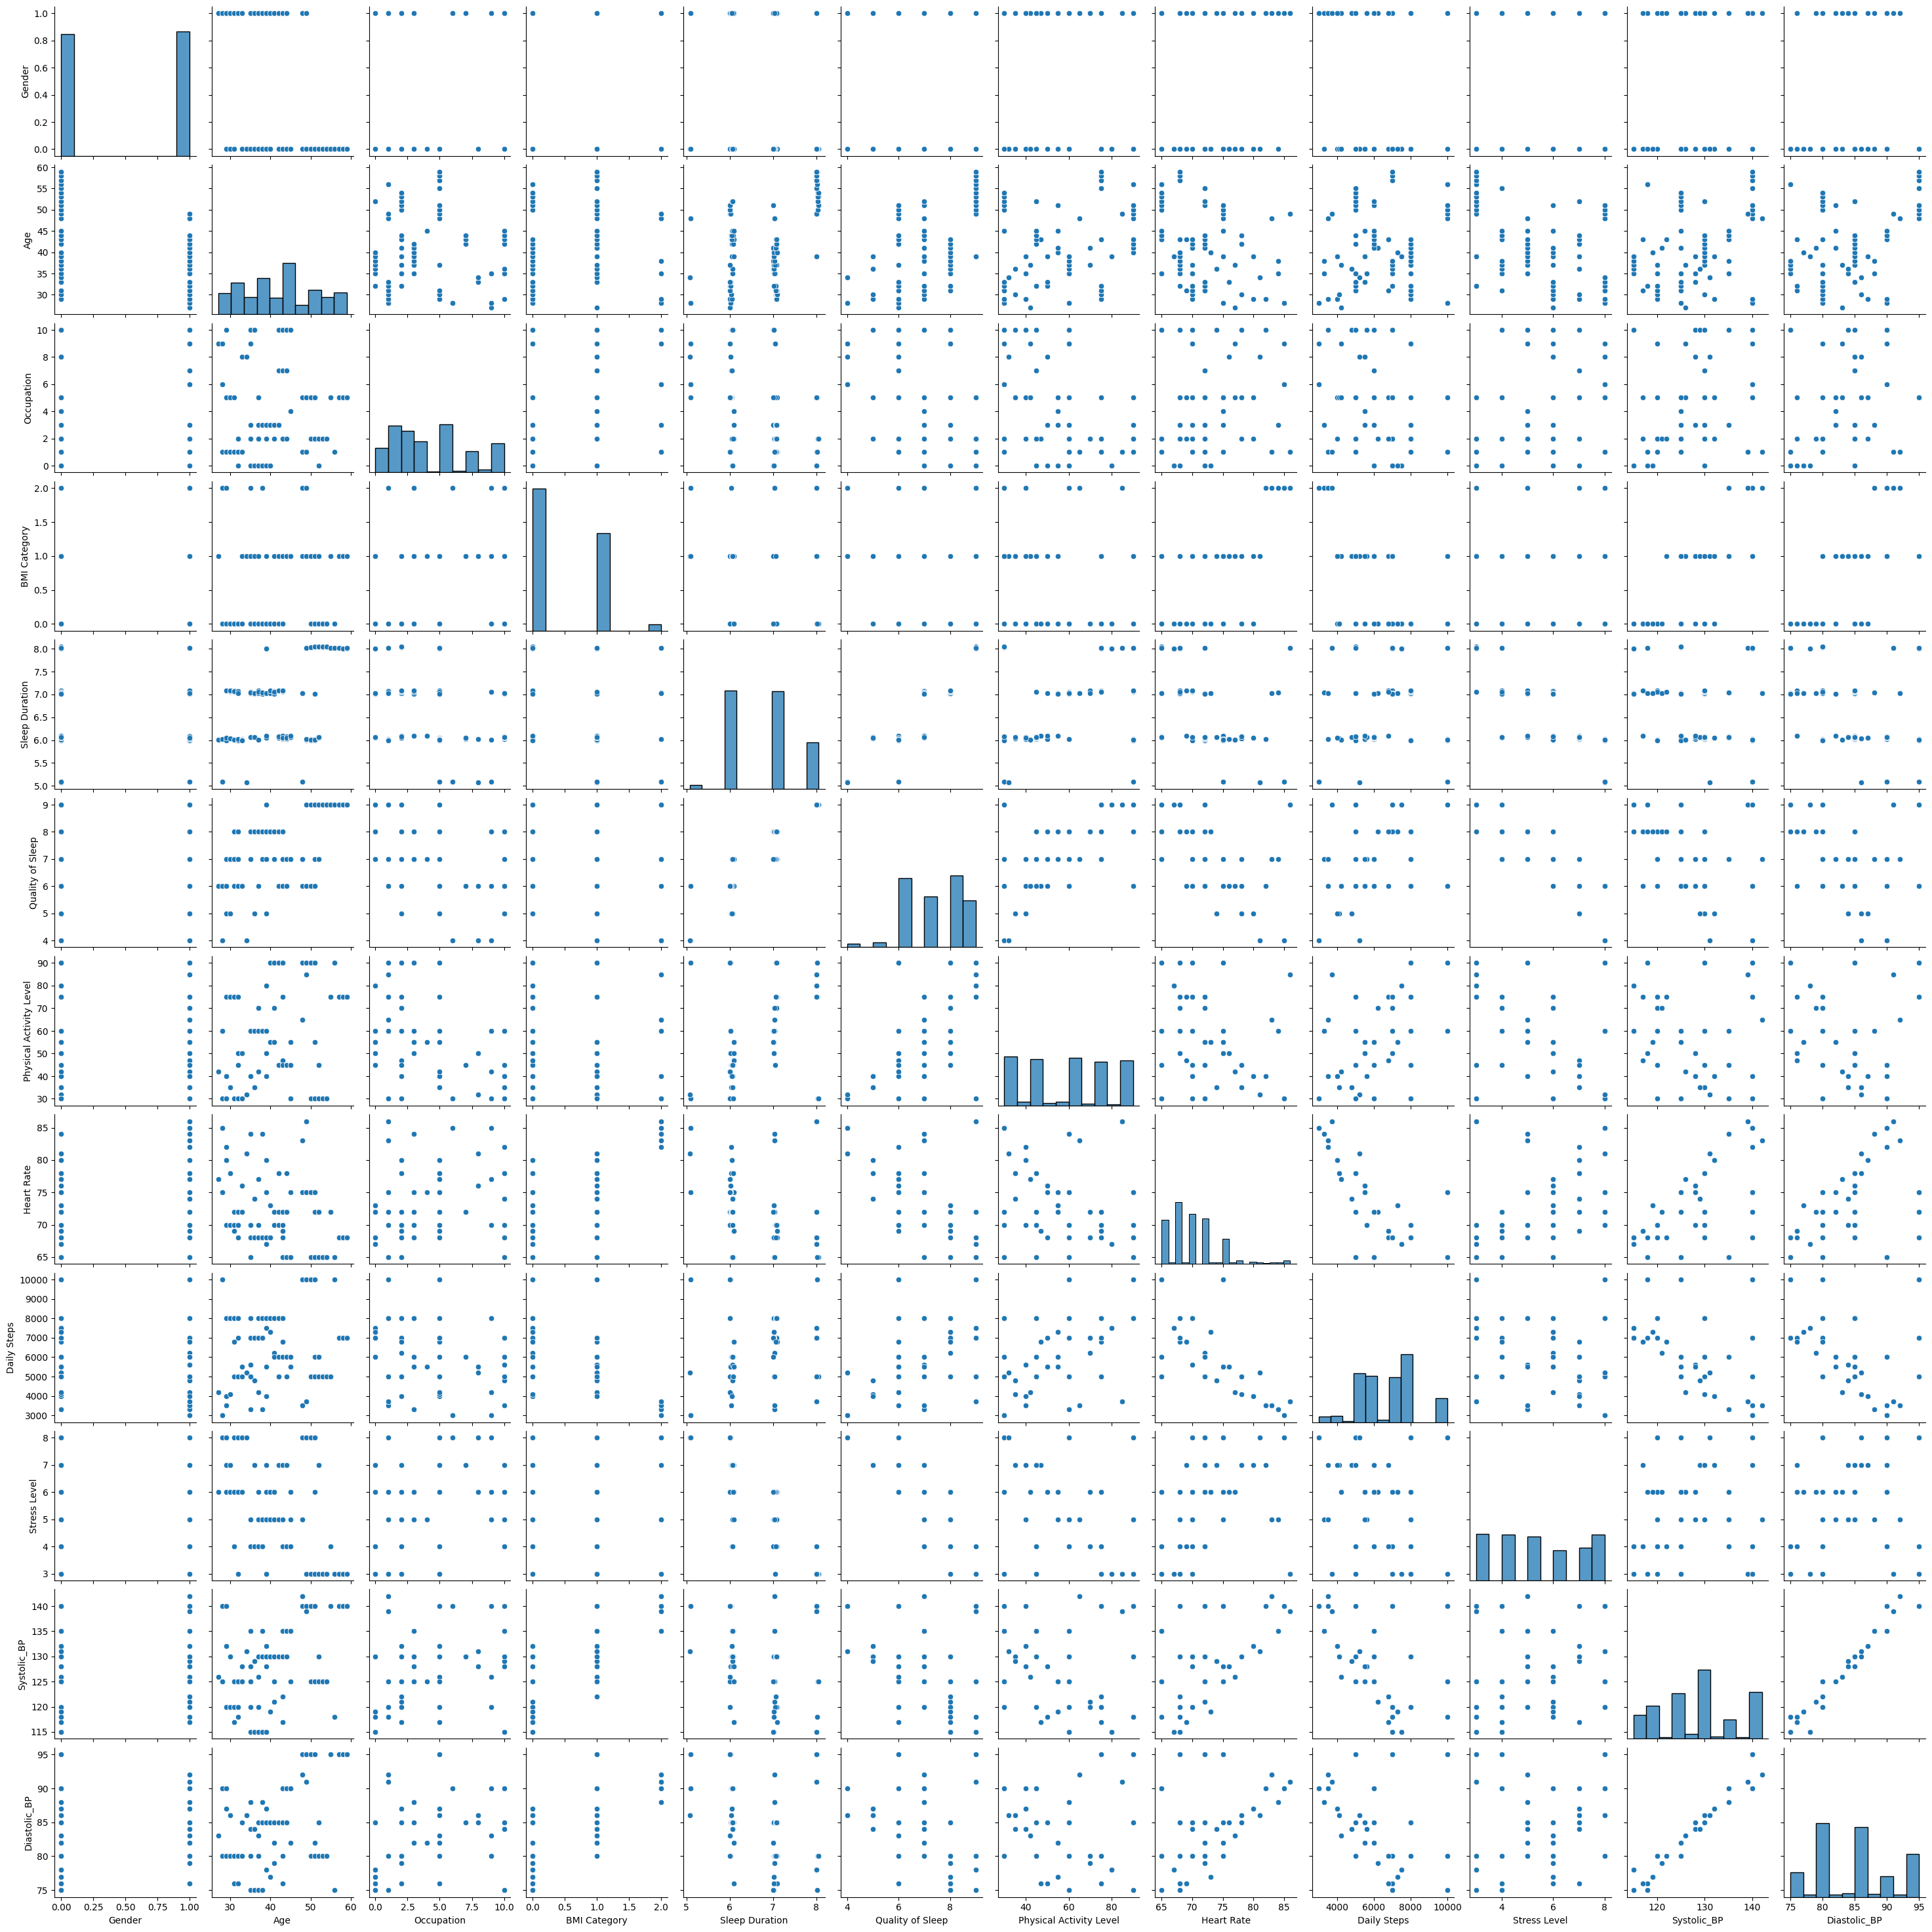

In [35]:
sns.pairplot(dataset)

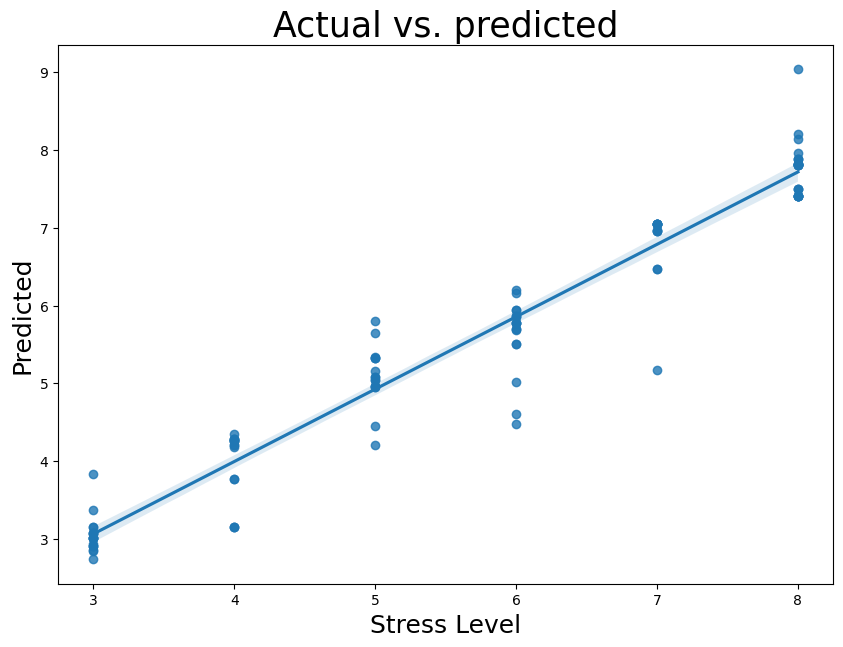

In [36]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted",fontsize=25)
plt.xlabel("Actual",fontsize=18)
plt.ylabel("Predicted", fontsize=18)
#plt.scatter(x=test_y,y=test_predict)
sns.regplot(x=y_test, y=y_pred)
plt.show()

In [37]:
feature_cols = ['Gender','Age','Occupation','BMI Category','Sleep Duration','Quality of Sleep','Physical Activity Level','Heart Rate','Daily Steps','Systolic_BP','Diastolic_BP']
X = dataset[feature_cols]
y = dataset['Stress Level']
list(zip(feature_cols, regressor.coef_))


[('Gender', 0.7667878601033965),
 ('Age', 2.5017980065940577),
 ('Occupation', -0.9737915072726363),
 ('BMI Category', -1.742793688078245),
 ('Sleep Duration', -1.5826150845477296),
 ('Quality of Sleep', -5.518458842700544),
 ('Physical Activity Level', -0.5928650282199783),
 ('Heart Rate', 2.176828711211926),
 ('Daily Steps', 1.4553585013259738),
 ('Systolic_BP', -1.2176343977473496),
 ('Diastolic_BP', 1.3531091547460046)]

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
print("Coefficient of determination :",r2_score(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))


Coefficient of determination : 0.9409316846390701
MSE:  0.19083751914008973
RMSE:  0.43684953833109375


In [38]:
dataset.corr()

,Gender,Age,Occupation,BMI Category,Sleep Duration,Quality of Sleep,Physical Activity Level,Heart Rate,Daily Steps,Stress Level,Systolic_BP,Diastolic_BP
Gender,1.000000,-0.596358,-0.219113,-0.242743,-0.216083,-0.291366,0.001454,0.217105,-0.014509,0.396018,-0.210527,-0.268378
Age,-0.596358,1.000000,0.231188,0.427704,0.429614,0.473734,0.178993,-0.225606,0.057973,-0.422344,0.605878,0.593839
Occupation,-0.219113,0.231188,1.000000,0.621570,-0.368364,-0.278071,-0.103660,0.043928,-0.105877,0.021123,0.518561,0.521835
BMI Category,-0.242743,0.427704,0.621570,1.000000,-0.330313,-0.324413,0.052076,0.469897,-0.142785,0.157649,0.740201,0.736578
Sleep Duration,-0.216083,0.429614,-0.368364,-0.330313,1.000000,0.929335,0.201901,-0.517091,-0.014899,-0.817182,-0.143270,-0.124266
Quality of Sleep,-0.291366,0.473734,-0.278071,-0.324413,0.929335,1.000000,0.192896,-0.659865,0.016791,-0.898752,-0.121632,-0.110151
Physical Activity Level,0.001454,0.178993,-0.103660,0.052076,0.201901,0.192896,1.000000,0.136971,0.772723,-0.034134,0.265416,0.382651
Heart Rate,0.217105,-0.225606,0.043928,0.469897,-0.517091,-0.659865,0.136971,1.000000,-0.030309,0.670026,0.294143,0.271092
Daily Steps,-0.014509,0.057973,-0.105877,-0.142785,-0.014899,0.016791,0.772723,-0.030309,1.000000,0.186829,0.103342,0.241986
Stress Level,0.396018,-0.422344,0.021123,0.157649,-0.817182,-0.898752,-0.034134,0.670026,0.186829,1.000000,0.102818,0.091811
